In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tor_explorer")

In [4]:
df = pd.read_csv('stations.csv')

In [5]:
df.head()

,District,Station,Latitude,Longitude
0,Central and Western,Hong Kong Station,22.279328,114.162813
1,Central and Western,Admiralty Station,22.278381,114.165013
2,Central and Western,Central Station,22.350627,114.184916
3,Central and Western,Kennedy Town Station,22.281363,114.127832
4,Central and Western,HKU Station,22.283976,114.135507


In [6]:
district_colors = {i: '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3)) for i in df['District'].unique()}
district_colors

{'Central and Western': '#8D6229',
 'Eastern': '#E0C5B0',
 'Islands': '#785047',
 'Kowloon City': '#C69B0E',
 'Kwai Tsing': '#77C014',
 'Kwai Tsing/Tsuen Wan': '#A5A642',
 'Kwun Tong': '#221E58',
 'North': '#38F2F0',
 'Sai Kung': '#C58107',
 'Sha Tin': '#846825',
 'Sham Shui Po': '#8C3306',
 'Sham Shui Po/Kowloon City': '#78516E',
 'Southern': '#884337',
 'Tai Po': '#EAB5AD',
 'Tsuen Wan': '#A68459',
 'Tuen Mun': '#E5961C',
 'Wan Chai': '#043807',
 'Wong Tai Sin': '#C87F3E',
 'Wong Tai Sin/Kwun Tong': '#E1CEC5',
 'Yau Tsim Mong': '#DD0AF2',
 'Yau Tsim Mong/Kowloon City': '#A6AC9E',
 'Yuen Long': '#FF68C4'}

In [7]:
def get_lat_long(address):
    location = geolocator.geocode(f'{address}, HK')
    try:
        return location.latitude, location.longitude
    except AttributeError:
        return 0, 0

In [8]:
map_hk = folium.Map(location=get_lat_long('Hong Kong'), zoom_start=12)

# add markers to map
for lat, lng, district, station in zip(df['Latitude'], df['Longitude'], df['District'], df['Station']):
    label = '{}, {}'.format(station, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=district_colors[district],
        fill=True,
        fill_color=district_colors[district],
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)

map_hk

# Explore Neighborhood

In [9]:
CLIENT_ID = 'BJQ21XYQUKHS440NK5TSVEXXTG440STT42ARC0XTH4I00GJE' # your Foursquare ID
CLIENT_SECRET = '4UORCAWYUFNNNXAFGKKGRJ11OJONHHV541L1YQ3DIQDTGQBU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJQ21XYQUKHS440NK5TSVEXXTG440STT42ARC0XTH4I00GJE
CLIENT_SECRET:4UORCAWYUFNNNXAFGKKGRJ11OJONHHV541L1YQ3DIQDTGQBU


In [10]:
# defining radius and limit of venues to get
radius=500
LIMIT=150

In [11]:
def getNearbyVenues(station, district, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for station, district, lat, lng in zip(station, district, latitudes, longitudes):
        print("Fetching venues for : ", station)            
        # create the API request URL
        # food category 4d4b7105d754a06374d81259
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            station,
            district,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station',
                             'District',
                             'Station Latitude', 
                             'Station Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [12]:
hk_venues = getNearbyVenues(station=df['Station'],
                            district=df['District'],
                            latitudes=df['Latitude'],
                            longitudes=df['Longitude'])

Fetching venues for :  Hong Kong Station
Fetching venues for :  Admiralty Station
Fetching venues for :  Central Station
Fetching venues for :  Kennedy Town Station
Fetching venues for :  HKU Station
Fetching venues for :  Sai Ying Pun Station
Fetching venues for :  Sheung Wan Station
Fetching venues for :  Tin Hau Station
Fetching venues for :  North Point Station
Fetching venues for :  Quarry Bay Station
Fetching venues for :  Fortress Hill Station
Fetching venues for :  Sai Wan Ho Station
Fetching venues for :  Shau Kei Wan Station
Fetching venues for :  Heng Fa Chuen Station
Fetching venues for :  Chai Wan Station
Fetching venues for :  Tai Koo Station
Fetching venues for :  Airport Station
Fetching venues for :  Tung Chung Station
Fetching venues for :  AsiaWorld–Expo Station
Fetching venues for :  Whampoa Station
Fetching venues for :  Ho Man Tin Station
Fetching venues for :  Kai Tak Station
Fetching venues for :  Kwai Fong Station
Fetching venues for :  Tsing Yi Station
Fetchin

In [13]:
hk_venues.shape

(2966, 8)

In [14]:
hk_venues.head(10)

,Station,District,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hong Kong Station,Central and Western,22.279328,114.162813,Ruth's Chris Steak House (茹絲葵牛排餐廳),22.279188,114.163833,Steakhouse
1,Hong Kong Station,Central and Western,22.279328,114.162813,Lobster Bar and Grill,22.277831,114.164887,Seafood Restaurant
2,Hong Kong Station,Central and Western,22.279328,114.162813,Howard's Gourmet (好酒好蔡),22.281469,114.161404,Chinese Restaurant
3,Hong Kong Station,Central and Western,22.279328,114.162813,Mott 32 (卅二公館),22.280696,114.159380,Dim Sum Restaurant
4,Hong Kong Station,Central and Western,22.279328,114.162813,Lawry's The Prime Rib,22.281377,114.162287,Steakhouse
5,Hong Kong Station,Central and Western,22.279328,114.162813,Café Gray Deluxe,22.277506,114.166320,Café
6,Hong Kong Station,Central and Western,22.279328,114.162813,Summer Palace (夏宮),22.277120,114.164802,Cantonese Restaurant
7,Hong Kong Station,Central and Western,22.279328,114.162813,Waterside Terrace,22.277438,114.163969,Thai Restaurant
8,Hong Kong Station,Central and Western,22.279328,114.162813,TWG Tea,22.278135,114.165884,Café
9,Hong Kong Station,Central and Western,22.279328,114.162813,Tien Yi Chinese Restaurant (天一酒家),22.277990,114.165901,Cantonese Restaurant


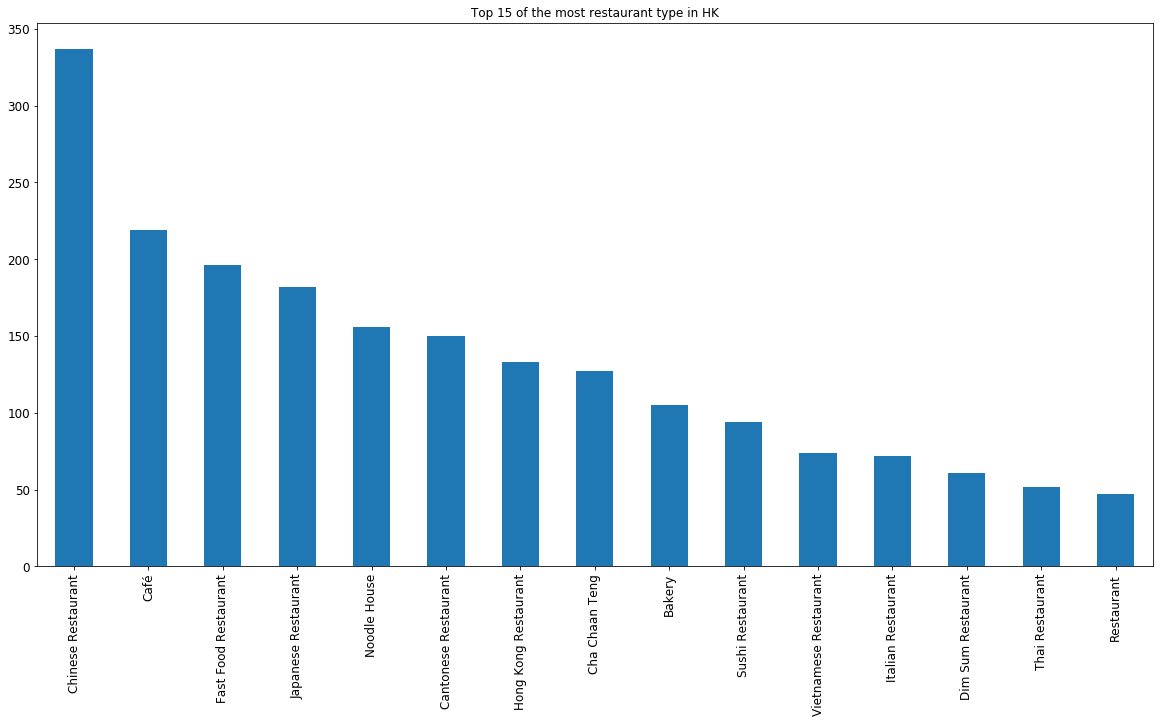

In [15]:
hk_venues['Venue Category'].value_counts()[:15].plot(kind='bar', figsize=(20, 10), fontsize=12,
                                                    title='Top 15 of the most restaurant type in HK')

Traditional Chinese resturants outnumber others by a significant portion, some of those type care repeated

In [16]:
district_type_df = hk_venues[['District', 'Venue Category']].groupby(['District', 'Venue Category']).agg(
    count_col=pd.NamedAgg(column="Venue Category", aggfunc="count")
).sort_values(['District', 'count_col'], ascending=False).reset_index()

In [17]:
district_type_df

,District,Venue Category,count_col
0,Yuen Long,Chinese Restaurant,13
1,Yuen Long,Fast Food Restaurant,11
2,Yuen Long,Café,5
3,Yuen Long,Noodle House,5
4,Yuen Long,Hong Kong Restaurant,4
5,Yuen Long,Sushi Restaurant,4
6,Yuen Long,Asian Restaurant,3
7,Yuen Long,Cantonese Restaurant,3
8,Yuen Long,Bakery,2
9,Yuen Long,Japanese Restaurant,2


Let's find how many restaurants each district has, and find the district with the most restaurant, and anylyze that district

In [18]:
district_type_df.groupby('District').agg({'count_col': sum}).sort_values('count_col', ascending=False)

,count_col
District,
Eastern,487
Yau Tsim Mong,478
Central and Western,338
Sha Tin,243
Kwun Tong,167
Sham Shui Po,158
Wan Chai,135
Sai Kung,128
Kowloon City,103


It seems that Eastern district has the most restaurant. Let's focus on Eastern district

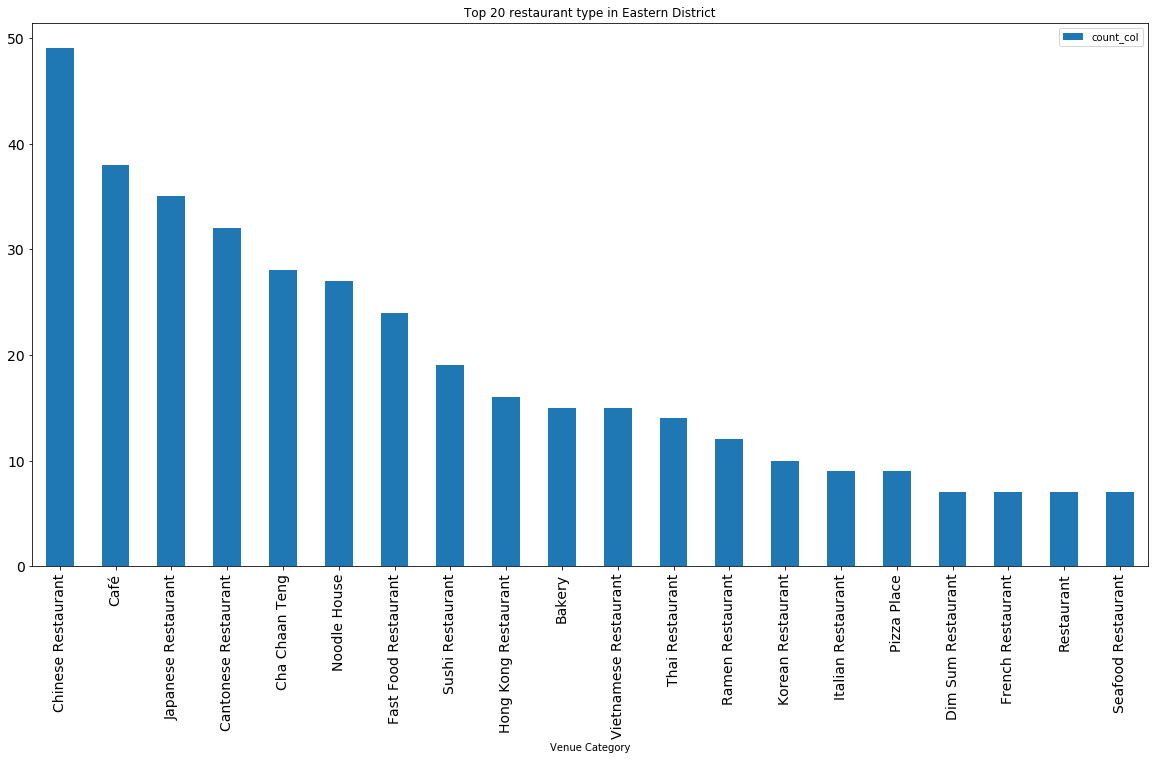

In [19]:
district_type_df[district_type_df['District'] == 'Eastern'][:20].plot(kind='bar', x='Venue Category', y='count_col', figsize=(20,10), fontsize=14,
                                                                     title='Top 20 restaurant type in Eastern District')

The top 10 shows a great decrease in trend. After pizza place, it seems to level off. Fast food restaurant is not that popular here as the eastern district is also an affluent neighborhood.

In [20]:
eastern_df = hk_venues[hk_venues['District'] == 'Eastern'].reset_index(drop=True)
eastern_df

,Station,District,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tin Hau Station,Eastern,22.282709,114.191492,I M Teppanyaki & Wine,22.280827,114.192132,Japanese Restaurant
1,Tin Hau Station,Eastern,22.282709,114.191492,Violet Cake Shop (惠籮餅店),22.284630,114.191747,Bakery
2,Tin Hau Station,Eastern,22.282709,114.191492,Sister Wah (華姐清湯腩),22.283200,114.191504,Noodle House
3,Tin Hau Station,Eastern,22.282709,114.191492,Taiwan Lang (台灣郎),22.283783,114.192458,Taiwanese Restaurant
4,Tin Hau Station,Eastern,22.282709,114.191492,Second Draft,22.279896,114.192447,Gastropub
5,Tin Hau Station,Eastern,22.282709,114.191492,Camper's (坐忘),22.285830,114.191495,Japanese Restaurant
6,Tin Hau Station,Eastern,22.282709,114.191492,The Red Gate,22.284775,114.192375,Korean Restaurant
7,Tin Hau Station,Eastern,22.282709,114.191492,Sushi Shin (鮨辰日本料理),22.280285,114.192422,Sushi Restaurant
8,Tin Hau Station,Eastern,22.282709,114.191492,協盛大排檔,22.285654,114.191834,Hong Kong Restaurant
9,Tin Hau Station,Eastern,22.282709,114.191492,Eight Treasures (八寶清湯腩),22.285460,114.191779,Noodle House


In [21]:
eastern_onehot = pd.get_dummies(eastern_df[['Venue Category']])
eastern_onehot[:5]

,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Beijing Restaurant,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Cantonese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Chinese Breakfast Place,Venue Category_Chinese Restaurant,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donburi Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Gastropub,Venue Category_Hainan Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Hotpot Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Korean Restaurant,Venue Category_Malay Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Modern European Restaurant,Venue Category_New American Restaurant,Venue Category_Noodle House,Venue Category_Pizza Place,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Salad Place,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shabu-Shabu Restaurant,Venue Category_Shanghai Restaurant,Venue Category_Snack Place,Venue Category_Soup Place,Venue Category_Spanish Restaurant,Venue Category_Steakhouse,Venue Category_Sushi Restaurant,Venue Category_Szechuan Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Takoyaki Place,Venue Category_Thai Restaurant,Venue Category_Tibetan Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Zhejiang Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
eastern_onehot['Station'] = eastern_df['Station']
eastern_grouped = eastern_onehot.groupby('Station').mean().reset_index()
eastern_grouped

,Station,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Beijing Restaurant,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Cantonese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Chinese Breakfast Place,Venue Category_Chinese Restaurant,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donburi Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Gastropub,Venue Category_Hainan Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Hotpot Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Korean Restaurant,Venue Category_Malay Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Modern European Restaurant,Venue Category_New American Restaurant,Venue Category_Noodle House,Venue Category_Pizza Place,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Salad Place,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shabu-Shabu Restaurant,Venue Category_Shanghai Restaurant,Venue Category_Snack Place,Venue Category_Soup Place,Venue Category_Spanish Restaurant,Venue Category_Steakhouse,Venue Category_Sushi Restaurant,Venue Category_Szechuan Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Takoyaki Place,Venue Category_Thai Restaurant,Venue Category_Tibetan Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Zhejiang Restaurant
0,Chai Wan Station,0.000000,0.026316,0.00,0.000000,0.052632,0.000000,0.000000,0.000000,0.00,0.000000,0.026316,0.000000,0.105263,0.078947,0.000000,0.263158,0.000000,0.000000,0.026316,0.026316,0.000000,0.00,0.105263,0.026316,0.000000,0.00,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.026316,0.026316,0.00,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.00
1,Fortress Hill Station,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.040000,0.02,0.000000,0.000000,0.060000,0.080000,0.040000,0.020000,0.080000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.040000,0.020000,0.040000,0.020000,0.040000,0.040000,0.020000,0.00,0.00,0.00,0.060000,0.020000,0.000000,0.020000,0.00,0.000000,0.040000,0.000000,0.000000,0.020000,0.00,0.00,0.000000,0.060000,0.02,0.000000,0.000000,0.020000,0.000000,0.00,0.040000,0.040000,0.00
2,Heng Fa Chuen Station,0.000000,0.000000,0.00,0.000000,0.150000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.05,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.00,0.00,0.050000,0.000000,0.050000,0.000000,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.050000,0.00,0.050000,0.000000,0.050000,0.000000,0.05,0.000000,0.000000,0.00
3,North Point Station,0.000000,0.000000,0.00,0.000000,0.030303,0.000000,0.000000,0.000000,0.00,0.060606,0.000000,0.060606,0.030303,0.090909,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.00,0.030303,0.000000,0.000000,0.00,0.030303,0.030303,0.060606,0.060606,0.000000,0.000000,0.060606,0.000000,0.030303,0.00,0.00,0.00,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.00,0.000000,0.060606,0.00,0.000000,0.000000,0.060606

In [23]:
number_of_top_venues = 5

In [24]:
for station in eastern_grouped['Station']:
    print('----------------',station,'----------------')
    temp = eastern_grouped[eastern_grouped['Station'] == station].T.reset_index()
    temp.columns = ['Type', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

---------------- Chai Wan Station ----------------
                                  Type  Frequency
0    Venue Category_Chinese Restaurant       0.26
1  Venue Category_Hong Kong Restaurant       0.11
2  Venue Category_Fast Food Restaurant       0.11
3  Venue Category_Cantonese Restaurant       0.11
4        Venue Category_Cha Chaan Teng       0.08


---------------- Fortress Hill Station ----------------
                                  Type  Frequency
0    Venue Category_Chinese Restaurant       0.08
1  Venue Category_Cantonese Restaurant       0.08
2                  Venue Category_Café       0.06
3      Venue Category_Sushi Restaurant       0.06
4          Venue Category_Noodle House       0.06


---------------- Heng Fa Chuen Station ----------------
                                         Type  Frequency
0                       Venue Category_Bakery       0.15
1         Venue Category_Cantonese Restaurant       0.15
2         Venue Category_Fast Food Restaurant       0.10
3    

#### Let's analyze the top station with most restaurants

In [25]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[:number_of_top_venues]

In [26]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [27]:
# create a new dataframe
stations_sorted = pd.DataFrame(columns=columns)
stations_sorted['Station'] = eastern_grouped['Station']

for ind in np.arange(eastern_grouped.shape[0]):
    stations_sorted.iloc[ind, 1:] = return_most_common_venues(eastern_grouped.iloc[ind, :], number_of_top_venues)

stations_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chai Wan Station,Venue Category_Chinese Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Vietnamese Restaurant,Venue Category_Bakery,Venue Category_Food Court,Venue Category_Donburi Restaurant,Venue Category_Diner
1,Fortress Hill Station,Venue Category_Cantonese Restaurant,Venue Category_Chinese Restaurant,Venue Category_Sushi Restaurant,Venue Category_Noodle House,Venue Category_Café,Venue Category_Cha Chaan Teng,Venue Category_Seafood Restaurant,Venue Category_Bistro,Venue Category_Korean Restaurant,Venue Category_Indian Restaurant
2,Heng Fa Chuen Station,Venue Category_Cantonese Restaurant,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Sandwich Place,Venue Category_Sushi Restaurant,Venue Category_Noodle House,Venue Category_Chinese Restaurant,Venue Category_Korean Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant
3,North Point Station,Venue Category_Cha Chaan Teng,Venue Category_Noodle House,Venue Category_Hotpot Restaurant,Venue Category_Burger Joint,Venue Category_Sushi Restaurant,Venue Category_Café,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Vietnamese Restaurant
4,Quarry Bay Station,Venue Category_Café,Venue Category_Japanese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Ramen Restaurant,Venue Category_Chinese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Noodle House,Venue Category_Italian Restaurant,Venue Category_Vietnamese Restaurant


# Clustering

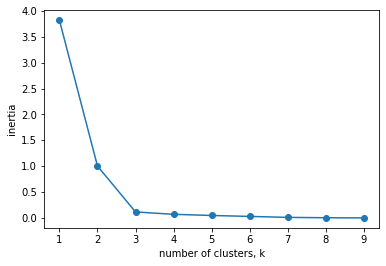

In [42]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(eastern_grouped.drop('Station', axis=1))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

k number should be 3, after 3 the inertia level off

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [30]:
kmeans.fit(eastern_grouped.drop('Station', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
eastern_grouped['Cluster'] = kmeans.labels_

In [32]:
eastern_grouped.groupby('Cluster')['Station'].count()

Cluster
0    3
1    5
2    1
Name: Station, dtype: int64

In [33]:
eastern_grouped

,Station,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Beijing Restaurant,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Cantonese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Chinese Breakfast Place,Venue Category_Chinese Restaurant,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donburi Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Gastropub,Venue Category_Hainan Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Hotpot Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Korean Restaurant,Venue Category_Malay Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Modern European Restaurant,Venue Category_New American Restaurant,Venue Category_Noodle House,Venue Category_Pizza Place,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Salad Place,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shabu-Shabu Restaurant,Venue Category_Shanghai Restaurant,Venue Category_Snack Place,Venue Category_Soup Place,Venue Category_Spanish Restaurant,Venue Category_Steakhouse,Venue Category_Sushi Restaurant,Venue Category_Szechuan Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Takoyaki Place,Venue Category_Thai Restaurant,Venue Category_Tibetan Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Zhejiang Restaurant,Cluster
0,Chai Wan Station,0.000000,0.026316,0.00,0.000000,0.052632,0.000000,0.000000,0.000000,0.00,0.000000,0.026316,0.000000,0.105263,0.078947,0.000000,0.263158,0.000000,0.000000,0.026316,0.026316,0.000000,0.00,0.105263,0.026316,0.000000,0.00,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.026316,0.026316,0.00,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.00,0
1,Fortress Hill Station,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.040000,0.02,0.000000,0.000000,0.060000,0.080000,0.040000,0.020000,0.080000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.040000,0.020000,0.040000,0.020000,0.040000,0.040000,0.020000,0.00,0.00,0.00,0.060000,0.020000,0.000000,0.020000,0.00,0.000000,0.040000,0.000000,0.000000,0.020000,0.00,0.00,0.000000,0.060000,0.02,0.000000,0.000000,0.020000,0.000000,0.00,0.040000,0.040000,0.00,1
2,Heng Fa Chuen Station,0.000000,0.000000,0.00,0.000000,0.150000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.05,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.00,0.00,0.050000,0.000000,0.050000,0.000000,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.050000,0.00,0.050000,0.000000,0.050000,0.000000,0.05,0.000000,0.000000,0.00,2
3,North Point Station,0.000000,0.000000,0.00,0.000000,0.030303,0.000000,0.000000,0.000000,0.00,0.060606,0.000000,0.060606,0.030303,0.090909,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.00,0.030303,0.000000,0.000000,0.00,0.030303,0.030303,0.060606,0.060606,0.000000,0.000000,0.060606,0.000000,0.030303,0.00,0.00,0.00,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.00,0.000000,0.060606,0.00,0.000000,0.0

In [34]:
stations_sorted = stations_sorted.merge(eastern_grouped, on='Station')

In [35]:
stations_sorted

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Beijing Restaurant,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Cantonese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Chinese Breakfast Place,Venue Category_Chinese Restaurant,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donburi Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Gastropub,Venue Category_Hainan Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Hotpot Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Korean Restaurant,Venue Category_Malay Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Modern European Restaurant,Venue Category_New American Restaurant,Venue Category_Noodle House,Venue Category_Pizza Place,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Salad Place,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shabu-Shabu Restaurant,Venue Category_Shanghai Restaurant,Venue Category_Snack Place,Venue Category_Soup Place,Venue Category_Spanish Restaurant,Venue Category_Steakhouse,Venue Category_Sushi Restaurant,Venue Category_Szechuan Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Takoyaki Place,Venue Category_Thai Restaurant,Venue Category_Tibetan Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Zhejiang Restaurant,Cluster
0,Chai Wan Station,Venue Category_Chinese Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Vietnamese Restaurant,Venue Category_Bakery,Venue Category_Food Court,Venue Category_Donburi Restaurant,Venue Category_Diner,0.000000,0.026316,0.00,0.000000,0.052632,0.000000,0.000000,0.000000,0.00,0.000000,0.026316,0.000000,0.105263,0.078947,0.000000,0.263158,0.000000,0.000000,0.026316,0.026316,0.000000,0.00,0.105263,0.026316,0.000000,0.00,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.026316,0.026316,0.00,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.00,0
1,Fortress Hill Station,Venue Category_Cantonese Restaurant,Venue Category_Chinese Restaurant,Venue Category_Sushi Restaurant,Venue Category_Noodle House,Venue Category_Café,Venue Category_Cha Chaan Teng,Venue Category_Seafood Restaurant,Venue Category_Bistro,Venue Category_Korean Restaurant,Venue Category_Indian Restaurant,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.040000,0.02,0.000000,0.000000,0.060000,0.080000,0.040000,0.020000,0.080000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.040000,0.020000,0.040000,0.020000,0.040000,0.040000,0.020000,0.00,0.00,0.00,0.060000,0.020000,0.000000,0.020000,0.00,0.000000,0.040000,0.000000,0.000000,0.020000,0.00,0.00,0.000000,0.060000,0.02,0.000000,0.000000,0.020000,0.000000,0.00,0.040000,0.040000,0.00,1
2,Heng Fa Chuen Station,Venue Category_Cantonese Restaurant,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Sandwich Place,Venue C

In [36]:
stations_sorted = stations_sorted.merge(eastern_df, on='Station')

In [37]:
stations_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Beijing Restaurant,Venue Category_Belgian Restaurant,Venue Category_Bistro,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Cantonese Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Chinese Breakfast Place,Venue Category_Chinese Restaurant,Venue Category_Deli / Bodega,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donburi Restaurant,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Court,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Gastropub,Venue Category_Hainan Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Hotpot Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Korean Restaurant,Venue Category_Malay Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Modern European Restaurant,Venue Category_New American Restaurant,Venue Category_Noodle House,Venue Category_Pizza Place,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Salad Place,Venue Category_Sandwich Place,Venue Category_Seafood Restaurant,Venue Category_Shabu-Shabu Restaurant,Venue Category_Shanghai Restaurant,Venue Category_Snack Place,Venue Category_Soup Place,Venue Category_Spanish Restaurant,Venue Category_Steakhouse,Venue Category_Sushi Restaurant,Venue Category_Szechuan Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Takoyaki Place,Venue Category_Thai Restaurant,Venue Category_Tibetan Restaurant,Venue Category_Udon Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Zhejiang Restaurant,Cluster,District,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chai Wan Station,Venue Category_Chinese Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Vietnamese Restaurant,Venue Category_Bakery,Venue Category_Food Court,Venue Category_Donburi Restaurant,Venue Category_Diner,0.0,0.026316,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.105263,0.078947,0.0,0.263158,0.0,0.0,0.026316,0.026316,0.0,0.0,0.105263,0.026316,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.026316,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0,Eastern,22.264819,114.237107,McDonald's (麥當勞),22.263260,114.237700,Fast Food Restaurant
1,Chai Wan Station,Venue Category_Chinese Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Vietnamese Restaurant,Venue Category_Bakery,Venue Category_Food Court,Venue Category_Donburi Restaurant,Venue Category_Diner,0.0,0.026316,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.105263,0.078947,0.0,0.263158,0.0,0.0,0.026316,0.026316,0.0,0.0,0.105263,0.026316,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.026316,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0,Eastern,22.264819,114.237107,Việt's Choicê (越棧),22.263958,114.237133,Vietnamese Restaurant
2,Chai Wan Station,Venue Category_Chinese Restaurant,Venue Category_Hong Kong Restaurant,Venue Category_Cantonese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Cha Chaan Teng,Venue Category_Vietnamese Rest

In [38]:
map_eastern_cluster = folium.Map(location=get_lat_long('Eastern District'), zoom_start=14)

In [39]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [40]:
for lat, lng, venue, station, cluster in zip(
    stations_sorted['Venue Latitude'],
    stations_sorted['Venue Longitude'],
    stations_sorted['Venue'],
    stations_sorted['Station'],
    stations_sorted['Cluster']
):
    label = '{} - {}, Cluster {}'.format(venue, station, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5,
        parse_html=False).add_to(map_eastern_cluster)

In [41]:
map_eastern_cluster

The cluster containing the least number is actually the richest neighborhood, maybe that concludes their different restaurant preference.

# Conclusion

It seems that nearby neighborhoods have similar eating perference, and some how a small cluster is found because of their unique preference. Well, the rich people in Hong Kong can keep their eating habits.